In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 127.5, 127.5, -0.5)

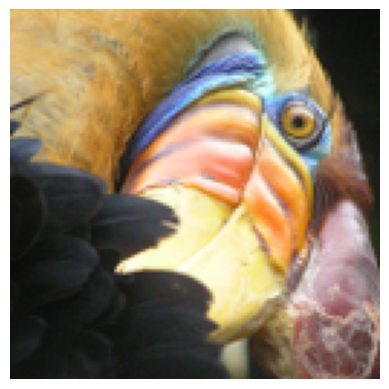

In [38]:
image = cv2.cvtColor(cv2.imread('bird_small.png'), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')

In [24]:
image.shape

(128, 128, 3)

(array([9256., 6560., 3971., 3931., 4708., 4236., 4529., 4362., 3553.,
        4046.]),
 array([  6. ,  30.9,  55.8,  80.7, 105.6, 130.5, 155.4, 180.3, 205.2,
        230.1, 255. ]),
 <BarContainer object of 10 artists>)

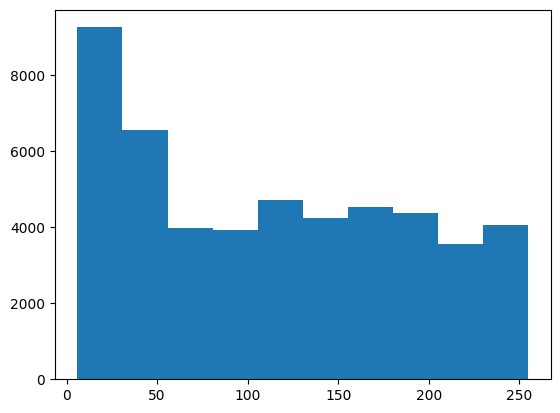

In [25]:
img_flat = image.reshape(-1,)
plt.hist(img_flat)

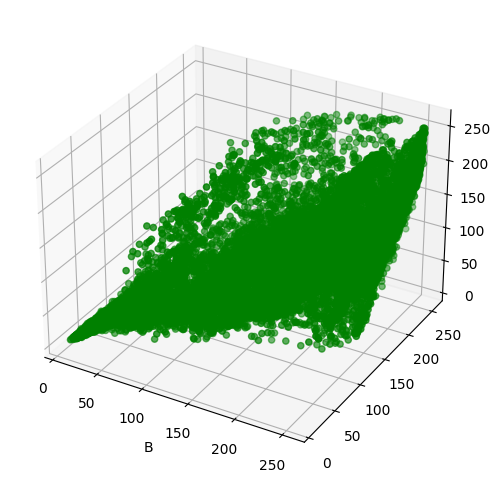

In [26]:
colours = image.reshape(-1, 3)
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(colours.T[0], colours.T[1], colours.T[2], color='green')
ax.set_xlabel('R')
ax.set_xlabel('G')
ax.set_xlabel('B')
plt.show()

In [27]:
colours.shape

(16384, 3)

In [28]:
k = 10
epochs = 10
means = np.array([np.random.randint(0, 256, (3, )) for i in range(k)])
# means = new_means
labels = np.zeros((colours.shape[0], 1))

for epoch in range(epochs):
    print(f'Epoch: {epoch+1}')
    counts = np.zeros((k,))
    for i in range(colours.shape[0]):
        distances = np.zeros((k,))
        for j in range(k):
            distances[j] = abs(colours[i][0]-means[j][0])+abs(colours[i][1]-means[j][1])+abs(colours[i][2]-means[j][2])#np.sqrt(np.dot((colours[i] - means[j]), (colours[i] - means[j])))
        labels[i][0] = int(np.argmin(distances))
        # print(distances)
        # print(labels[i][0])
        counts[int(labels[i][0])] += 1
    
    new_means = np.zeros((k, 3))
    for i in range(colours.shape[0]):
        new_means[int(labels[i][0])] += (colours[i] / counts[int(labels[i][0])])

    means = new_means

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


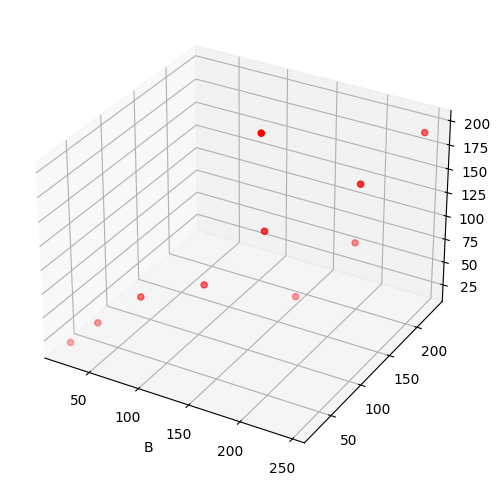

In [29]:
colours = image.reshape(-1, 3)
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
# ax.scatter3D(colours.T[0], colours.T[1], colours.T[2], color='green')
ax.scatter3D(means.T[0], means.T[1], means.T[2], color='red')
# ax.scatter3D(new_means.T[0], new_means.T[1], new_means.T[2], color='blue')
ax.set_xlabel('R')
ax.set_xlabel('G')
ax.set_xlabel('B')
plt.show()

In [30]:
dummy = colours
for i in range(colours.shape[0]):
    dummy[i] = means[int(labels[i][0])]
img = dummy.reshape(image.shape[0], image.shape[1], 3)
# img

(-0.5, 127.5, 127.5, -0.5)

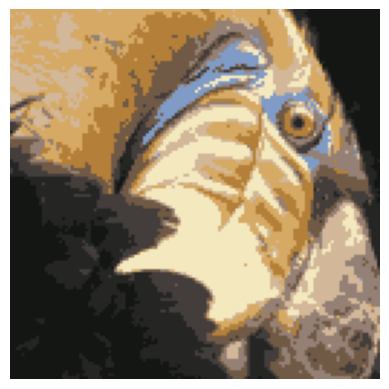

In [32]:
plt.imshow(img)
plt.axis('off')

The Raw implementation of KMeans is not fast enough for large images. So we shift to use the SkLearn's KMeans

In [33]:
class Compress:
    def __init__(self, image):
        self.img = image.copy()
        self.h = image.shape[0]
        self.w = image.shape[1]
    
    def params(self, clusters):
        self.clusters = clusters
        self.seed = np.random.randint(1, 50)
        self.kmeans = KMeans(n_clusters = clusters, max_iter=300, init='k-means++', n_init='auto', random_state=self.seed)
    
    def preprocess(self):
        self.img = self.img.reshape(-1, 3)
    
    def get_output(self, blobs):
        self.preprocess()
        
        self.params(blobs)
        self.kmeans.fit(self.img)
        centroids = self.kmeans.cluster_centers_
        predictions = self.kmeans.predict(self.img)
        print(predictions)
        dummy_img = self.img
        for i in range(dummy_img.shape[0]):
            dummy_img[i] = centroids[int(predictions[i])]
        dummy_img = dummy_img.reshape(self.h, self.w, 3)
        return dummy_img

In [39]:
c = Compress(image.copy())
img = c.get_output(10)

[0 0 0 ... 6 6 6]


(-0.5, 127.5, 127.5, -0.5)

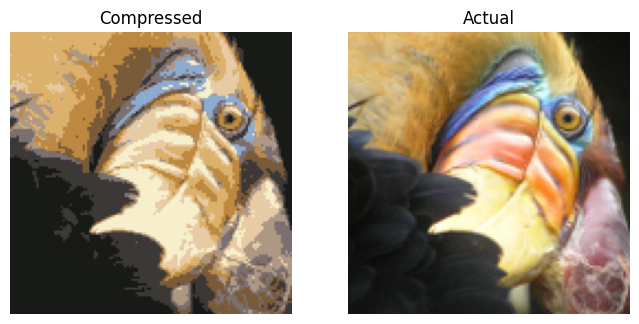

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(8,8))
axs[0].imshow(img)
axs[0].set_title('Compressed')
axs[0].axis('off')
axs[1].imshow(image)
axs[1].set_title('Actual')
axs[1].axis('off')

In [52]:
cv2.imwrite('output.png', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

True